In [1]:
import json
import os
import pathlib
import pickle
import tensorflow as tf
import re
import importlib
import zipfile
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


In [2]:
database_dir = 'database_no_ingredients'


def get_recipe_parse_ready(recipe, f):
    return ((f + recipe).strip()).split("\n")


# function to read file and parse
def read_raw_file(filename: str):
    with open(f'./{database_dir}/{filename}', 'r', encoding='cp437') as file:
        file_read = file.read().strip().replace("ADVERTISEMENT", '')

        # get the separator
        current_f = file_read.split("\n")[0]
        split = file_read.split(current_f)[1:]

        return [(get_recipe_parse_ready(recipe, current_f)) for recipe in split]


files = (os.listdir(f'./{database_dir}/'))
data = []

for filename in files:
    parsed_file = read_raw_file(filename)
    data.extend(parsed_file)

print(len(data))


122930


In [101]:
print(data[8])


['---------- Recipe via Meal-Master (tm) v7.04', '', 'Title: The Best Rolled Sugar Cookies', '', 'In a large bowl, cream together butter and sugar until smooth. Beat in eggs and vanilla. Stir in the flour, baking powder, and salt. Cover, and chill dough for at least one hour (or overnight).', 'Preheat oven to 400 degrees F (200 degrees C). Roll out dough on floured surface 1/4 to 1/2 inch thick. Cut into shapes with any cookie cutter. Place cookies 1 inch apart on ungreased cookie sheets.', 'Bake 6 to 8 minutes in preheated oven. Cool completely.', '', '------']


In [15]:

import parse_recipe as RecipeParser
importlib.reload(RecipeParser)


def parse_recipe(recipe: str):
    parsed = RecipeParser.parse_recipe(recipe)
    # if (parsed.title == "Beer-battered Asparagus with Garlic Aioli"):
    #     print(parsed.directions)
    #     raise Exception("stop")
    return parsed


recipes = [parse_recipe(x) for x in data]
print(len(recipes))


122930


['In a large bowl, cream together butter and sugar until smooth. Beat in eggs and vanilla. Stir in the flour, baking powder, and salt. Cover, and chill dough for at least one hour (or overnight). Preheat oven to 400 degrees F (200 degrees C). Roll out dough on floured surface 1/4 to 1/2 inch thick. Cut into shapes with any cookie cutter. Place cookies 1 inch apart on ungreased cookie sheets. Bake 6 to 8 minutes in preheated oven. Cool completely.', '------']


In [65]:
TITLE_STOP_WORD = '🆃🅸🆃🅻🅴\n'
# INGREDIENTS_STOP_WORD = '🅸🅽🅶🆁🅴🅳🅸🅴🅽🆃🆂\n'
INSTRUCTIONS_STOP_WORD = '🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂\n'


def recipe_to_string(recipe: RecipeParser.Recipe):
    # This string is presented as a part of recipes so we need to clean it up.

    title = recipe.title
    ingredients = recipe.ingredients
    instructions = recipe.directions

    ingredients_string = ''
    for ingredient in ingredients:
        if ingredient:
            ingredients_string += f'• {ingredient}\n'

    instructions_string = ''
    for instruction in instructions:
        if instruction:
            instruction = instruction.strip()
            instructions_string += f'▪︎ {instruction}\n'

    # remove weird characters from instructions
    instructions_string = instructions_string.replace(
        ";", "").replace("▪︎", "").replace("------", "").strip()
    title = title.replace(".", "").strip()

    # if isntructions has like some weird characters
    if (len(instructions_string) < 5):
        return ""

    if len(title) < 2:
        return ""
    elif title == "qaV113":
        return ""
    elif title == "Title" or instructions == "Title":
        return ""

    final_str = f'{TITLE_STOP_WORD}{title}\n\n{INSTRUCTIONS_STOP_WORD}{instructions_string}'
    # if (title == "Beer-battered Asparagus with Garlic Aioli"):
    #     print(final_str)
    #     raise Exception("stop")
    return final_str


string_recipes = [recipe_to_string(recipe) for recipe in recipes]
print(len(string_recipes))


122930


In [66]:
def filter_weird_recipes(recipe):
    exclude_words = [".com", '.net', 'org']
    
    if not recipe:
        return False
    elif any([x in recipe for x in exclude_words]):
        return False

    return True

filtered_string_recipes = list(filter(filter_weird_recipes, string_recipes))

# count = 0
# i = 0

# for x in filtered_string_recipes:
#     if not x:
#         print(i)
#         break
#     if len(x.split(" ")) == 0:
#         count += 1
#     elif x == "":
#         count += 1
#     elif len(x.split(" ")) < 10:
#         count += 1
#         print(x)
#         if count == 30:
#             break

#     i += 1

# print(count)


🆃🅸🆃🅻🅴
The Cape Codder

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Mix all ingredients together and serve.
🆃🅸🆃🅻🅴
Tartar Sauce

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Mix ingredients together, refrigerate, and serve as needed.
🆃🅸🆃🅻🅴
Peach Bellini

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Combine, stir, serve over ice.
🆃🅸🆃🅻🅴
Doug's Recipe

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Mix it all togeter (1). Start over again(1).
🆃🅸🆃🅻🅴
Marlowe's Black Magic

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Blend well, cover and store.
🆃🅸🆃🅻🅴
Michelada

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Roll into salted pint Blend until smooth.
🆃🅸🆃🅻🅴
Friendship Butterflies

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Friendship Butterflies
🆃🅸🆃🅻🅴
Kahlua Black Russian

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Pour over ice in a rocks glass.
🆃🅸🆃🅻🅴
Chocolatini

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Shake all ingredients with ice in a cocktail shaker.
🆃🅸🆃🅻🅴
Dill Mayonnaise

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Mix thoroughly in a bowl.
🆃🅸🆃🅻🅴
Rum Punch

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Combine all ingredients and serve over ice.
🆃🅸🆃🅻🅴
The Killer

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Process all ingredients in a juicer.
🆃🅸🆃🅻🅴
Chocolatini

🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂
Shake all ingredients with ice in a cocktail shaker.
🆃🅸🆃🅻🅴
Sunset Cocktail

🅸🅽🆂🆃🆁🆄🅲🆃

In [73]:
MAX_NUM_WORDS = 250


def filter_recipes_by_length(recipe_test):
    return len((recipe_test.split(" "))) <= MAX_NUM_WORDS


max_len_recipes = [
    recipe_text for recipe_text in filtered_string_recipes if filter_recipes_by_length(recipe_text)]


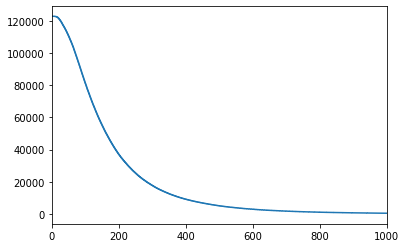

In [69]:
recipe_lens = [len(x.split(" ")) for x in string_recipes]
recipe_lens.sort(reverse=True)
plt.plot(recipe_lens, np.arange(len(string_recipes)))
plt.xlim([0, 1000])
plt.show()


In [74]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\inos1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\inos1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
lm = WordNetLemmatizer()
ps = PorterStemmer()


In [76]:
for i in range(len(max_len_recipes)):
    sentence = max_len_recipes[i]
    sentence = lm.lemmatize(sentence)
    tokens = nltk.word_tokenize(sentence)
    nltk_data = " ".join(tokens)
    max_len_recipes[i] = nltk_data


In [84]:
STOP_SIGN = '<STOP>'
CAP = 6000
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    # char_level=True,
    num_words=CAP,
    char_level=False,
    filters='▪︎()',
    lower=True,
    split=' '
)

# Stop word is not a part of recipes, but tokenizer must know about it as well.
tokenizer.fit_on_texts([STOP_SIGN]*3000)
tokenizer.fit_on_texts(max_len_recipes)

# tokenizer.get_config()


In [86]:

word_freq_sorted = sorted(
    tokenizer.word_counts.items(), key=lambda item: item[1], reverse=True)

# print(word_freq_sorted[10000][0])
# print(tokenizer.word_index[word_freq_sorted[10000][0]], tokenizer.word_index['seattle'])
word_ranks = [tokenizer.word_index[x[0]] for x in word_freq_sorted]
# print(word_ranks)


C:\Users\inos1\AppData\Local\Temp/ipykernel_123844/1919945428.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 30000])


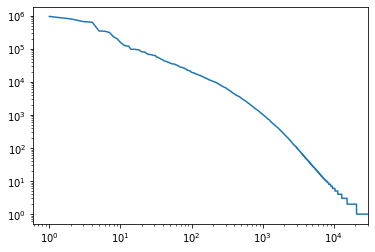

In [87]:
plt.loglog(word_ranks, [x[1] for x in word_freq_sorted])
# plt.scatter()
plt.xlim([0, 30000])
# plt.ylim([0, 50000])
# plt.autoscale()
plt.show()


In [85]:
print("vocab before shortening", len(tokenizer.word_index))


vocab before shortening 38547


In [88]:
sorted_by_word_count = sorted(
    tokenizer.word_counts.items(), key=lambda kv: kv[1], reverse=True)
tokenizer.word_index = {}
i = 0
for word, count in sorted_by_word_count:
    if i == CAP:
        break
    tokenizer.word_index[word] = i + 1    # <= because tokenizer is 1 indexed
    i += 1


In [89]:
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
print(VOCABULARY_SIZE)


6001


In [90]:
# data_vectorized = tokenizer.texts_to_sequences(max_len_recipes)
# print(re.sub(' (?! )', '' , as_string))
print(max_len_recipes[123])
print(tokenizer.sequences_to_texts(
    tokenizer.texts_to_sequences([max_len_recipes[123]])))


🆃🅸🆃🅻🅴 Banana Pudding IV 🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂 In a large bowl , beat cream cheese until fluffy . Beat in condensed milk , pudding mix , cold milk and vanilla until smooth . Fold in 1/2 of the whipped topping . Line the bottom of a 9x13 inch dish with vanilla wafers . Arrange sliced bananas evenly over wafers . Spread with pudding mixture . Top with remaining whipped topping . Chill .
['🆃🅸🆃🅻🅴 banana pudding iv 🅸🅽🆂🆃🆁🆄🅲🆃🅸🅾🅽🆂 in a large bowl , beat cream cheese until fluffy . beat in condensed milk , pudding mix , cold milk and vanilla until smooth . fold in 1/2 of the whipped topping . line the bottom of a 9x13 inch dish with vanilla wafers . arrange sliced bananas evenly over wafers . spread with pudding mixture . top with remaining whipped topping . chill .']


In [91]:
data_vectorized = tokenizer.texts_to_sequences(max_len_recipes)
# print(' '.join(tokenizer.sequences_to_texts(data_vectorized)))


In [92]:

data_padded = tf.keras.preprocessing.sequence.pad_sequences(
    data_vectorized,
    padding='post',
    truncating='post',
    maxlen=MAX_NUM_WORDS - 1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

data_padded = tf.keras.preprocessing.sequence.pad_sequences(
    data_padded,
    padding='post',
    truncating='post',
    maxlen=MAX_NUM_WORDS + 1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)


In [38]:
print(string_recipes[3596])


▪︎ Preheat the oven to 350 degrees F (175 degrees C). In a medium bowl, stir together the whole wheat flour, all-purpose flour, and 3/4 teaspoon salt. Pour in the vegetable oil and water; mix until just blended. On a lightly floured surface, roll out the dough as thin as possible - no thicker than 1/8 inch. Place dough on an ungreased baking sheet, and mark squares out with a knife, but don't cut through. Prick each cracker with a fork a few times, and sprinkle with salt. Bake for 15 to 20 minutes in the preheated oven, or until crisp and light brown. Baking time may be different depending on how thin your crackers are. When cool, remove from baking sheet, and separate into individual crackers.



In [35]:
i = 0
count = 0

for recipe in data_padded:
    if (np.all(recipe == 46)):
        print(i)
        print(tokenizer.sequences_to_texts([recipe]))
        count += 1
        break
    i += 1

print(count)


3596
['<stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop> <stop>']
1


In [18]:
# print(data_padded[2])
print(tokenizer.sequences_to_texts([data_padded[2]]))


['preheat oven to 350 degrees f 175 degrees c . lightly grease a 5x9 inch loaf pan . press the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar . in a mixing bowl , mix thoroughly all remaining ingredients and shape into a loaf . place on top of the ketchup . bake in preheated oven for 1 hour or until juices are clear . <stop> <stop>']


In [93]:
# os.makedirs('./saved_data')
with open('./saved_data/tokenizer.pickle', 'wb+') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./saved_data/data_padded.pickle', 'wb+') as handle:
    pickle.dump(data_padded, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [28]:
with open("../error_file.pickle", 'rb') as handle:
    error_file = pickle.load(handle)

print((error_file.numpy() != 46))
tokenizer.sequences_to_texts([[46]])


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


['<stop>']